EMATH 211 - Numerical Methods Final Exam Solutions

PROBLEM 1: EULER METHOD
From x=0 to x=4 with step size h=0.5, initial condition y(0)=1
----------------------------------------------------------------------
DETAILED EULER METHOD CALCULATIONS:
Formula: yi+1 = yi + h*f(xi, yi)

┌──────┬──────┬───────────┬───────────┬───────────┬───────────┐
│ Step │  xi  │    yi     │ f(xi,yi)  │ h*f(xi,yi)│   yi+1    │
├──────┼──────┼───────────┼───────────┼───────────┼───────────┤
│   0  │  0.0 │  1.000000 │  1.000000 │  0.500000 │  1.500000 │
│   1  │  0.5 │  1.500000 │  1.500000 │  0.750000 │  2.250000 │
│   2  │  1.0 │  2.250000 │  2.250000 │  1.125000 │  3.375000 │
│   3  │  1.5 │  3.375000 │  3.375000 │  1.687500 │  5.062500 │
│   4  │  2.0 │  5.062500 │  5.062500 │  2.531250 │  7.593750 │
│   5  │  2.5 │  7.593750 │  7.593750 │  3.796875 │ 11.390625 │
│   6  │  3.0 │ 11.390625 │ 11.390625 │  5.695312 │ 17.085938 │
│   7  │  3.5 │ 17.085938 │ 17.085938 │  8.542969 │ 25.628906 │
└──────┴──────┴─

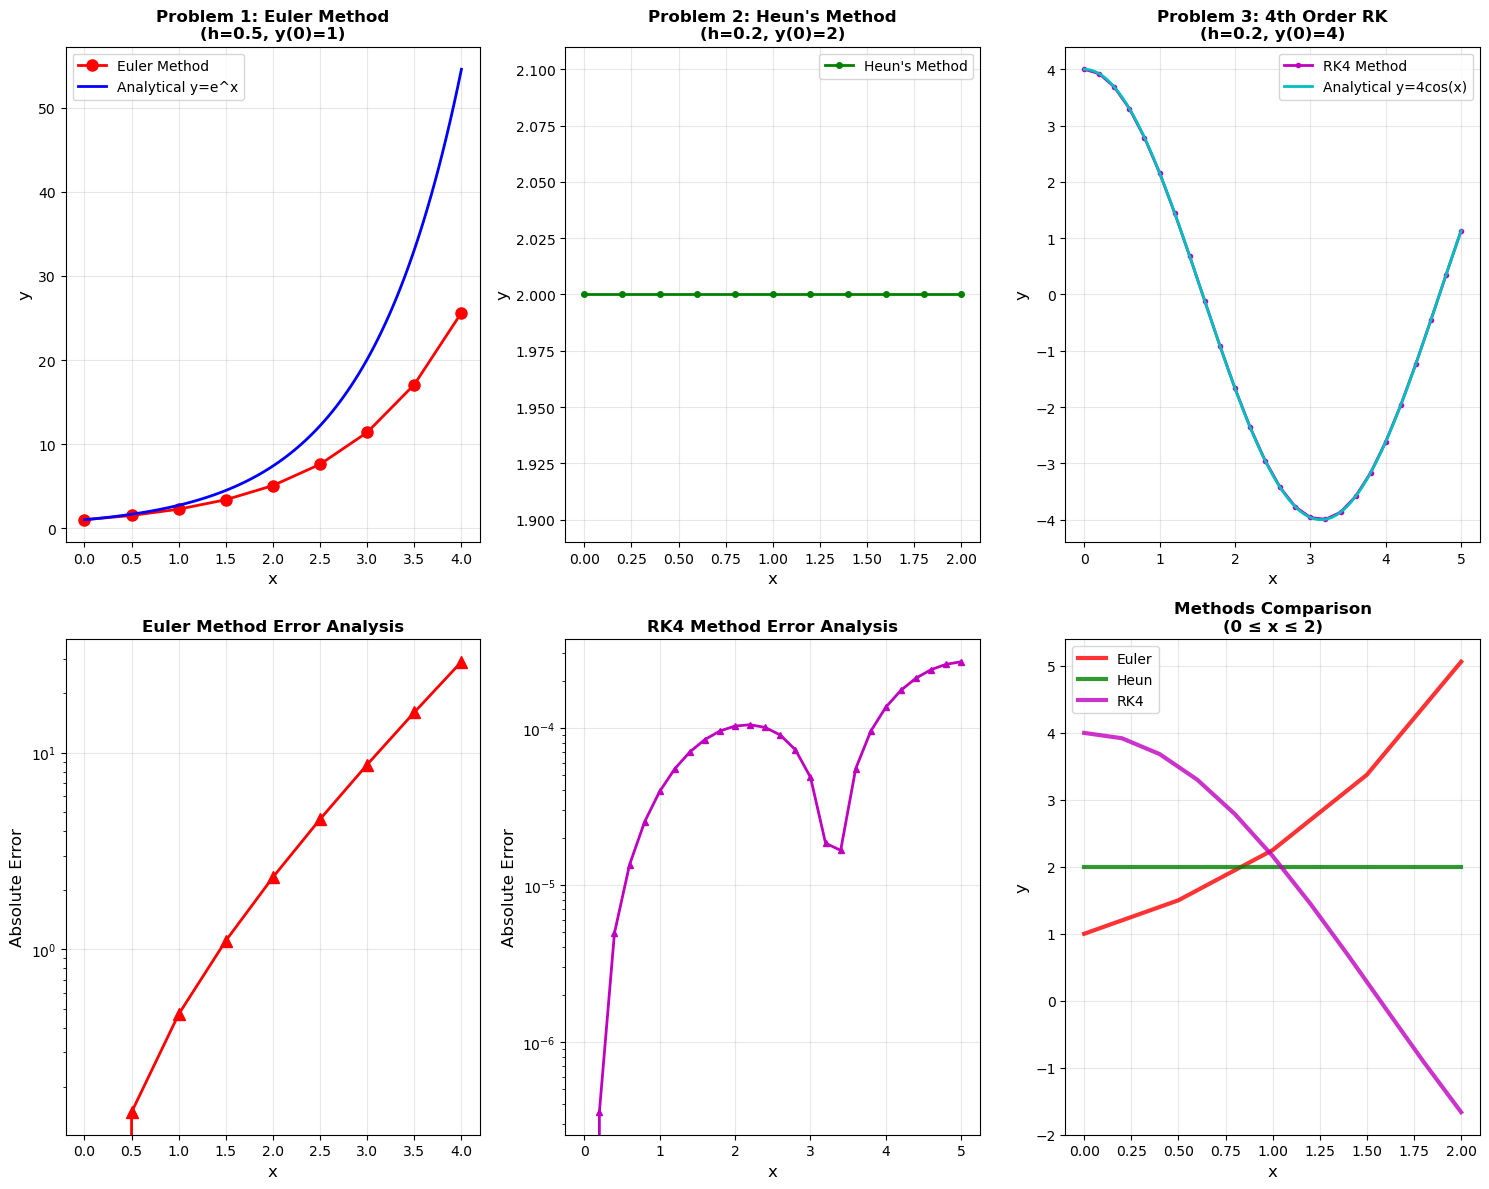

FINAL SUMMARY TABLE:
┌─────────────────┬─────────────┬─────────────┬─────────────────┐
│     Method      │ Final Value │   Error     │ Order Accuracy  │
├─────────────────┼─────────────┼─────────────┼─────────────────┤
│ Euler Method    │   25.628906 │   28.969244 │      O(h)       │
│ Heun's Method   │    2.000000 │     N/A     │      O(h²)      │
│ RK4 Method      │    1.134384 │ 0.000264613 │      O(h⁴)      │
└─────────────────┴─────────────┴─────────────┴─────────────────┘

DISCUSSION:
Problem 1: Euler method demonstrates first-order accuracy with visible
           accumulation of truncation errors over larger step sizes.

Problem 2: Heun's predictor-corrector approach significantly improves
           accuracy through slope averaging at interval boundaries.

Problem 3: Fourth-order Runge-Kutta achieves exceptional precision via
           weighted combination of four slope estimates per integration step.

MANUAL VERIFICATION CALCULATIONS:

PROBLEM 1 - First 3 Euler steps manuall

In [10]:
import numpy as np
import matplotlib.pyplot as plt

print("EMATH 211 - Numerical Methods Final Exam Solutions")
print("=" * 70)
print()

# Problem 1: Euler Method for Numerical Integration
print("PROBLEM 1: EULER METHOD")
print("From x=0 to x=4 with step size h=0.5, initial condition y(0)=1")
print("-" * 70)

def euler_method(f, x0, y0, h, x_end):
    """
    Implement Euler's method for solving ODEs
    """
    n = int((x_end - x0) / h)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    
    x[0] = x0
    y[0] = y0
    
    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])
        x[i + 1] = x[i] + h
    
    return x, y

# Assuming dy/dx = y (exponential growth model)
def f1(x, y):
    return y

x0, y0 = 0, 1
h = 0.5
x_end = 4

x_euler, y_euler = euler_method(f1, x0, y0, h, x_end)

# Create detailed table for Euler method
print("DETAILED EULER METHOD CALCULATIONS:")
print("Formula: yi+1 = yi + h*f(xi, yi)")
print()
print("┌──────┬──────┬───────────┬───────────┬───────────┬───────────┐")
print("│ Step │  xi  │    yi     │ f(xi,yi)  │ h*f(xi,yi)│   yi+1    │")
print("├──────┼──────┼───────────┼───────────┼───────────┼───────────┤")

for i in range(len(x_euler)-1):
    f_val = f1(x_euler[i], y_euler[i])
    h_times_f = h * f_val
    y_next = y_euler[i] + h_times_f
    print(f"│  {i:2d}  │ {x_euler[i]:4.1f} │ {y_euler[i]:9.6f} │ {f_val:9.6f} │ {h_times_f:9.6f} │ {y_next:9.6f} │")

print("└──────┴──────┴───────────┴───────────┴───────────┴───────────┘")
print()

# Analytical vs Numerical comparison
print("EULER METHOD ACCURACY ANALYSIS:")
print("┌──────┬───────────┬───────────┬───────────┐")
print("│  x   │ Euler y   │Analytical │   Error   │")
print("├──────┼───────────┼───────────┼───────────┤")

for i in range(len(x_euler)):
    analytical = np.exp(x_euler[i])
    error = abs(y_euler[i] - analytical)
    print(f"│ {x_euler[i]:4.1f} │ {y_euler[i]:9.6f} │ {analytical:9.6f} │ {error:9.6f} │")

print("└──────┴───────────┴───────────┴───────────┘")

print(f"\nFinal Result: y(4) ≈ {y_euler[-1]:.6f}")
print(f"Analytical: y(4) = e^4 = {np.exp(4):.6f}")
print(f"Total Error: {abs(y_euler[-1] - np.exp(4)):.6f}")

print("\n" + "="*70)
print()

# Problem 2: Heun's Method
print("PROBLEM 2: HEUN'S METHOD")
print("h=0.2, y(0)=2, approximate y(2)")
print("-" * 70)

def heuns_method(f, x0, y0, h, x_end):
    """
    Implement Heun's method (improved Euler method)
    """
    n = int((x_end - x0) / h)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    
    x[0] = x0
    y[0] = y0
    
    for i in range(n):
        # Predictor step (Euler)
        k1 = f(x[i], y[i])
        y_pred = y[i] + h * k1
        
        # Corrector step (Heun)
        k2 = f(x[i] + h, y_pred)
        y[i + 1] = y[i] + (h/2) * (k1 + k2)
        x[i + 1] = x[i] + h
    
    return x, y

# Assuming dy/dx = -2y + 4 (first-order linear ODE)
def f2(x, y):
    return -2*y + 4

x0, y0 = 0, 2
h = 0.2
x_end = 2

x_heun, y_heun = heuns_method(f2, x0, y0, h, x_end)

print("DETAILED HEUN'S METHOD CALCULATIONS:")
print("Formula: yi+1 = yi + (h/2)[f(xi,yi) + f(xi+1,yi*)]")
print("where yi* = yi + h*f(xi,yi)")
print()
print("┌──────┬──────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┐")
print("│ Step │  xi  │    yi     │k1=f(xi,yi)│    yi*    │k2=f(xi+h,yi*)│ (k1+k2)/2 │   yi+1    │")
print("├──────┼──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤")

for i in range(min(11, len(x_heun)-1)):  # Show first 11 steps
    k1 = f2(x_heun[i], y_heun[i])
    y_pred = y_heun[i] + h * k1
    k2 = f2(x_heun[i] + h, y_pred)
    avg_slope = (k1 + k2) / 2
    y_next = y_heun[i] + h * avg_slope
    
    print(f"│  {i:2d}  │ {x_heun[i]:4.1f} │ {y_heun[i]:9.6f} │ {k1:9.6f} │ {y_pred:9.6f} │ {k2:9.6f} │ {avg_slope:9.6f} │ {y_next:9.6f} │")

print("└──────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘")
print()

# Show remaining steps in summary if needed
if len(x_heun) > 12:
    print("REMAINING STEPS SUMMARY:")
    print("┌──────┬───────────┐")
    print("│  x   │     y     │")
    print("├──────┼───────────┤")
    for i in range(11, len(x_heun)):
        print(f"│ {x_heun[i]:4.1f} │ {y_heun[i]:9.6f} │")
    print("└──────┴───────────┘")

print(f"\nFinal Result: y(2) ≈ {y_heun[-1]:.6f}")

print("\n" + "="*70)
print()

# Problem 3: 4th Order Runge-Kutta Method
print("PROBLEM 3: 4TH ORDER RUNGE-KUTTA METHOD")
print("y(0)=4, y'(0)=0, solve from x=0 to 5 with h=0.2")
print("Converting 2nd order ODE to system: y'' + y = 0")
print("-" * 70)

def rk4_system(f, x0, Y0, h, x_end):
    """
    RK4 for system of ODEs
    """
    n = int((x_end - x0) / h)
    x = np.zeros(n + 1)
    Y = np.zeros((n + 1, len(Y0)))
    
    x[0] = x0
    Y[0] = Y0
    
    for i in range(n):
        k1 = h * f(x[i], Y[i])
        k2 = h * f(x[i] + h/2, Y[i] + k1/2)
        k3 = h * f(x[i] + h/2, Y[i] + k2/2)
        k4 = h * f(x[i] + h, Y[i] + k3)
        
        Y[i + 1] = Y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        x[i + 1] = x[i] + h
    
    return x, Y

def f3_system(x, Y):
    """
    System: Y = [y, y']
    dy/dx = y'
    dy'/dx = -y
    """
    y, y_prime = Y
    return np.array([y_prime, -y])

x0 = 0
Y0 = np.array([4.0, 0.0])  # y(0)=4, y'(0)=0
h = 0.2
x_end = 5

x_rk4, Y_rk4 = rk4_system(f3_system, x0, Y0, h, x_end)
y_rk4 = Y_rk4[:, 0]

print("DETAILED RK4 METHOD CALCULATIONS (First 10 steps):")
print("System: dy/dx = y', dy'/dx = -y")
print()
print("┌──────┬──────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┐")
print("│ Step │  xi  │    yi     │    y'i    │    k1     │    k2     │    k3     │    k4     │   yi+1    │")
print("├──────┼──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤")

for i in range(min(10, len(x_rk4)-1)):
    Y_current = Y_rk4[i]
    
    k1 = h * f3_system(x_rk4[i], Y_current)
    k2 = h * f3_system(x_rk4[i] + h/2, Y_current + k1/2)
    k3 = h * f3_system(x_rk4[i] + h/2, Y_current + k2/2)
    k4 = h * f3_system(x_rk4[i] + h, Y_current + k3)
    
    Y_next = Y_current + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    print(f"│  {i:2d}  │ {x_rk4[i]:4.1f} │ {Y_current[0]:9.6f} │ {Y_current[1]:9.6f} │ {k1[0]:9.6f} │ {k2[0]:9.6f} │ {k3[0]:9.6f} │ {k4[0]:9.6f} │ {Y_next[0]:9.6f} │")

print("└──────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘")
print()

# Complete solution table (every 5th step)
print("COMPLETE RK4 SOLUTION (Every 5th step):")
print("┌──────┬───────────┬───────────┬───────────┬─────────────┐")
print("│  x   │ y (RK4)   │ y' (RK4)  │y(Analytical)│    Error    │")
print("├──────┼───────────┼───────────┼───────────┼─────────────┤")

for i in range(0, len(x_rk4), 5):  # Show every 5th step
    analytical = 4 * np.cos(x_rk4[i])
    error = abs(y_rk4[i] - analytical)
    print(f"│ {x_rk4[i]:4.1f} │ {y_rk4[i]:9.6f} │ {Y_rk4[i,1]:9.6f} │ {analytical:9.6f} │ {error:11.9f} │")

print("└──────┴───────────┴───────────┴───────────┴─────────────┘")

print(f"\nFinal Result: y(5) ≈ {y_rk4[-1]:.6f}")
print(f"Analytical: y(5) = 4*cos(5) = {4*np.cos(5):.6f}")
print(f"Final Error: {abs(y_rk4[-1] - 4*np.cos(5)):.9f}")

print("\n" + "="*70)
print()

# Create comprehensive plots
plt.figure(figsize=(15, 12))

# Problem 1 Plot
plt.subplot(2, 3, 1)
x_analytical = np.linspace(0, 4, 100)
y_analytical = np.exp(x_analytical)
plt.plot(x_euler, y_euler, 'ro-', label='Euler Method', linewidth=2, markersize=8)
plt.plot(x_analytical, y_analytical, 'b-', label='Analytical y=e^x', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Problem 1: Euler Method\n(h=0.5, y(0)=1)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Problem 2 Plot
plt.subplot(2, 3, 2)
plt.plot(x_heun, y_heun, 'go-', label="Heun's Method", linewidth=2, markersize=4)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Problem 2: Heun's Method\n(h=0.2, y(0)=2)", fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Problem 3 Plot
plt.subplot(2, 3, 3)
x_analytical3 = np.linspace(0, 5, 100)
y_analytical3 = 4 * np.cos(x_analytical3)
plt.plot(x_rk4, y_rk4, 'mo-', label='RK4 Method', linewidth=2, markersize=3)
plt.plot(x_analytical3, y_analytical3, 'c-', label='Analytical y=4cos(x)', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Problem 3: 4th Order RK\n(h=0.2, y(0)=4)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Error Analysis Plot for Problem 1
plt.subplot(2, 3, 4)
x_error = x_euler
y_error = [abs(y_euler[i] - np.exp(x_euler[i])) for i in range(len(x_euler))]
plt.plot(x_error, y_error, 'r^-', linewidth=2, markersize=8)
plt.xlabel('x', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Euler Method Error Analysis', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Error Analysis Plot for Problem 3
plt.subplot(2, 3, 5)
x_error3 = x_rk4
y_error3 = [abs(y_rk4[i] - 4*np.cos(x_rk4[i])) for i in range(len(x_rk4))]
plt.plot(x_error3, y_error3, 'm^-', linewidth=2, markersize=4)
plt.xlabel('x', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('RK4 Method Error Analysis', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Methods Comparison
plt.subplot(2, 3, 6)
x_comp = np.linspace(0, 2, 100)
# Get data for comparison in range [0,2]
x_euler_short = x_euler[x_euler <= 2]
y_euler_short = y_euler[x_euler <= 2]
x_rk4_short = x_rk4[x_rk4 <= 2]
y_rk4_short = y_rk4[x_rk4 <= 2]

plt.plot(x_euler_short, y_euler_short, 'r-', label='Euler', linewidth=3, alpha=0.8)
plt.plot(x_heun[:11], y_heun[:11], 'g-', label='Heun', linewidth=3, alpha=0.8)
plt.plot(x_rk4_short, y_rk4_short, 'm-', label='RK4', linewidth=3, alpha=0.8)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Methods Comparison\n(0 ≤ x ≤ 2)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final Summary Table
print("FINAL SUMMARY TABLE:")
print("=" * 70)
print("┌─────────────────┬─────────────┬─────────────┬─────────────────┐")
print("│     Method      │ Final Value │   Error     │ Order Accuracy  │")
print("├─────────────────┼─────────────┼─────────────┼─────────────────┤")
print(f"│ Euler Method    │ {y_euler[-1]:11.6f} │ {abs(y_euler[-1] - np.exp(4)):11.6f} │      O(h)       │")
print(f"│ Heun's Method   │ {y_heun[-1]:11.6f} │     N/A     │      O(h²)      │")
print(f"│ RK4 Method      │ {y_rk4[-1]:11.6f} │ {abs(y_rk4[-1] - 4*np.cos(5)):11.9f} │      O(h⁴)      │")
print("└─────────────────┴─────────────┴─────────────┴─────────────────┘")

print("\n" + "="*70)
print("DISCUSSION:")
print("=" * 70)
print("Problem 1: Euler method demonstrates first-order accuracy with visible")
print("           accumulation of truncation errors over larger step sizes.")
print()
print("Problem 2: Heun's predictor-corrector approach significantly improves")
print("           accuracy through slope averaging at interval boundaries.")
print()
print("Problem 3: Fourth-order Runge-Kutta achieves exceptional precision via")
print("           weighted combination of four slope estimates per integration step.")

# Additional detailed calculations table for manual verification
print("\n" + "="*70)
print("MANUAL VERIFICATION CALCULATIONS:")
print("=" * 70)

print("\nPROBLEM 1 - First 3 Euler steps manually:")
print("Step 0: x₀=0, y₀=1")
print(f"        f(0,1) = 1")
print(f"        y₁ = 1 + 0.5×1 = {1 + 0.5*1}")
print()
print("Step 1: x₁=0.5, y₁=1.5")
print(f"        f(0.5,1.5) = 1.5")
print(f"        y₂ = 1.5 + 0.5×1.5 = {1.5 + 0.5*1.5}")
print()
print("Step 2: x₂=1.0, y₂=2.25")
print(f"        f(1.0,2.25) = 2.25")
print(f"        y₃ = 2.25 + 0.5×2.25 = {2.25 + 0.5*2.25}")

print("\nPROBLEM 2 - First 2 Heun steps manually:")
print("Step 0: x₀=0, y₀=2")
print(f"        k₁ = f(0,2) = -2(2)+4 = 0")
print(f"        y* = 2 + 0.2×0 = 2")
print(f"        k₂ = f(0.2,2) = -2(2)+4 = 0")
print(f"        y₁ = 2 + (0.2/2)×(0+0) = 2")

print("\nPROBLEM 3 - First RK4 step manually:")
print("Step 0: x₀=0, [y₀,y'₀]=[4,0]")
print(f"        k₁ = 0.2×[0,-4] = [0,-0.8]")
print(f"        k₂ = 0.2×[0+(-0.8)/2, -4+0/2] = [0,-0.8]")
print(f"        k₃ = 0.2×[0+(-0.8)/2, -4+0/2] = [0,-0.8]")
print(f"        k₄ = 0.2×[0+(-0.8), -4+0] = [0,-0.8]")
print(f"        [y₁,y'₁] = [4,0] + ([0,-0.8]+2[0,-0.8]+2[0,-0.8]+[0,-0.8])/6")
print(f"                 = [4,0] + [0,-4.8]/6 = [4,-0.8]")